## 使用 keras 進行深度學習
### 前言:

1. Keras 的簡介與運作方法:

       Keras 為開放原始碼、高階模型(model-level)級的深度學習程式庫。它只處理模型的建立、訓練與預測等功能，深度學習底層的運作(Ex: 張量/矩陣運算)交由後端引擎(backend engine)計算。
       
2. Keras 配合的兩種後端引擎(backend engine):

   - TensorFlow
   - Theano



3. Keras 的特色:

   - 簡單快速的建立 prototyping
   - 已內建各種種神經網路的層級
   - 透過後端引擎，可以在 CPU 或 GPU 運行
   - keras 開發的程式碼具有簡潔、可讀性、容易維護與高生產力等優點
   - keras 有非常齊全的線上說明文件

### 一、安裝並執行 TensorFlow 與 Keras 模組 (Windows 系統)

(前置動作: 已安裝 Anaconda 並建立工作目錄)

1. 建立 Anaconda 虛擬環境: conda create --name tensorflow_ev python=3.5 anaconda
                
       conda create: 建立虛擬環境
       --name tensorflow_ev: 虛擬環境名稱為 tensorflow_ev
       python=3.5: python 版本為 3.5
       anaconda: 在建立虛擬環境時，同時安裝其他 python 套件
       
       [註]: 在 jupyter notebook 匯入 tensorflow 和 Keras 模組時，若發生錯誤訊息， 則用 pip install [模組名稱] --upgrade 更新相關錯誤的模組 (Ex: numpy、h5py...)
       
2. 啟動/關閉 Anaconda 虛擬環境: activate/deactivate tensorflow_ev



3. 安裝 TensorFlow CPU 版本 (在虛擬環境中執行): pip install tensorflow



4. 安裝 Keras CPU 版本 (在虛擬環境中執行): pip install keras



5. 開啟 jupyter notebook 並匯入 tensorflow 和 keras 模組後，進行後續計算工作 (在虛擬環境中執行)

In [1]:
import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)

1.13.1
2.2.4


Using TensorFlow backend.


### 二、Keras 下載 MNIST 辨識資料集

In [2]:
import numpy as np
import pandas as pd
# 此模組要將 label 轉換成 one-hot-coding
from keras.utils import np_utils
# 匯入用來下載 mnist 資料的模組
from keras.datasets import mnist

# 下載 mnist 資料 (資料儲存在 C:\Users\user\.keras 資料夾)
(x_train_image, t_train_label), (x_test_image, t_test_label) = mnist.load_data()

# 查看 mnist 資料筆數
print('x train data = ', len(x_train_image))
print('t train data = ', len(t_train_label))
print('x test data = ', len(x_test_image))
print('t test data = ', len(t_test_label))
print('-----------------------------------')

# 查看訓練資料
print('x_train_image:', x_train_image.shape)
print('t_train_label:', t_train_label.shape)
print('-----------------------------------')

# 查看測試資料
print('x_test_image:', x_test_image.shape)
print('t_test_label:', t_test_label.shape)
print('-----------------------------------')

x train data =  60000
t train data =  60000
x test data =  10000
t test data =  10000
-----------------------------------
x_train_image: (60000, 28, 28)
t_train_label: (60000,)
-----------------------------------
x_test_image: (10000, 28, 28)
t_test_label: (10000,)
-----------------------------------


顯示訓練資料前五個影像:


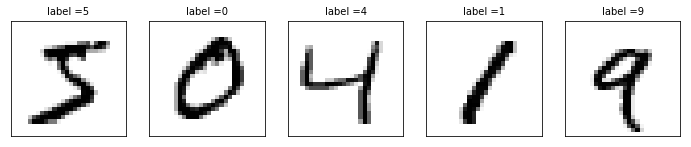

---------------------------------------------------------------------------------------------
顯示測試資料前五個影像:


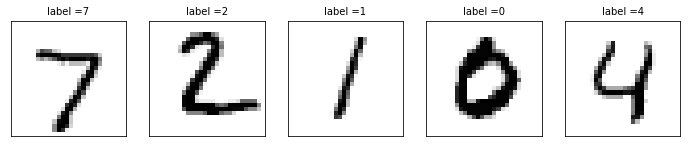

---------------------------------------------------------------------------------------------


In [4]:
import matplotlib.pyplot as plt

# 定義顯示資料的函數
def plot_image_label_prediction(images, labels, prediction, idx, num = 5):
    # 設定圖形的大小
    fig = plt.gcf()
    fig.set_size_inches(12, 15)
    
    if num > 10: num = 10
    
    for i in range(0, num):
        # 建立子圖為 2 行 5 列
        ax = plt.subplot(2, 5, 1+i)
        # 畫出子圖形
        ax.imshow(images[idx], cmap = 'binary')
        # 子圖 title 名稱
        title = 'label =' + str(labels[idx])
        # 若有預測資料，則顯示預測結果
        if len(prediction) > 0:
            title += ',predict =' + str(prediction[idx])
        
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([])
        ax.set_yticks([])
        
        idx += 1
        
    plt.show()
    
# 顯示訓練資料前五個影像
print('顯示訓練資料前五個影像:')
plot_image_label_prediction(x_train_image, t_train_label, [], 0, 5)
print('---------------------------------------------------------------------------------------------')

# 顯示測試資料前五個影像
print('顯示測試資料前五個影像:')
plot_image_label_prediction(x_test_image, t_test_label, [], 0, 5)
print('---------------------------------------------------------------------------------------------')

### 三、Keras 執行多層感知器 (MLP)

#### 1. 資料預處理 (Preprocess)

In [5]:
# 將 28*28 數字影像轉換成 1*784 個浮點數
x_train = x_train_image.reshape(60000, 784).astype('float32')
x_test = x_test_image.reshape(10000, 784).astype('float32')

# 將 feature 歸一化
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

# 將 label 進行 one-hot-encoding 轉換
t_train_onehot = np_utils.to_categorical(t_train_label)
t_test_onehot = np_utils.to_categorical(t_test_label)

#### 2. 建立多層感知器 (MLP) 的神經網路模型

In [7]:
# 匯入所需的模組
from keras.models import Sequential
from keras.layers import Dense

# 建立線性堆疊模型(骨架)
model = Sequential()

# 建立輸入層與隱藏層(用 model.add 將 Dense 神經網路層加入以建立的骨架中)
# 參數說明: input_dim (輸入層神經元數目)，units (隱藏層神經元數目)，
# kernel_initializer (初始化權重)，activation (活化函數)          
model.add(Dense(units = 50, input_dim = 784, kernel_initializer = 'normal', activation = 'relu'))

# 建立輸出層
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

# 查看模型摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
None


#### 3. 進行神經網路的訓練

In [9]:
# 定義訓練方式
# 參數說明: loss (損失函數)，optimizer (最佳化的方法)，metrics (評估模型的方式)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 開始訓練
# 參數說明: x, y (輸入的資料)，validation_split (驗證資料的比例)
# epochs (訓練週期)， batch_size (批次數量)，verbose (顯示訓練的過程)
train_history = model.fit(x = x_train_normalize, y = t_train_onehot, validation_split = 0.2, 
                         epochs = 10, batch_size = 100, verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.0797 - acc: 0.9772 - val_loss: 0.1166 - val_acc: 0.9660
Epoch 2/10
 - 1s - loss: 0.0721 - acc: 0.9794 - val_loss: 0.1139 - val_acc: 0.9666
Epoch 3/10
 - 1s - loss: 0.0668 - acc: 0.9805 - val_loss: 0.1115 - val_acc: 0.9688
Epoch 4/10
 - 1s - loss: 0.0603 - acc: 0.9829 - val_loss: 0.1076 - val_acc: 0.9690
Epoch 5/10
 - 1s - loss: 0.0566 - acc: 0.9836 - val_loss: 0.1093 - val_acc: 0.9678
Epoch 6/10
 - 1s - loss: 0.0519 - acc: 0.9853 - val_loss: 0.1089 - val_acc: 0.9691
Epoch 7/10
 - 1s - loss: 0.0475 - acc: 0.9867 - val_loss: 0.1091 - val_acc: 0.9693
Epoch 8/10
 - 1s - loss: 0.0436 - acc: 0.9876 - val_loss: 0.1056 - val_acc: 0.9698
Epoch 9/10
 - 1s - loss: 0.0399 - acc: 0.9889 - val_loss: 0.1043 - val_acc: 0.9709
Epoch 10/10
 - 1s - loss: 0.0367 - acc: 0.9894 - val_loss: 0.1092 - val_acc: 0.9694


#### 4. 圖形顯示訓練過程

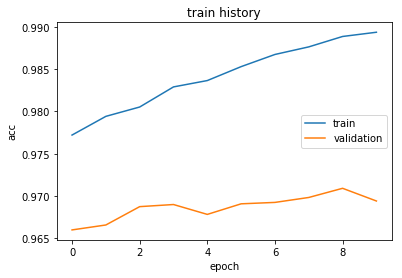

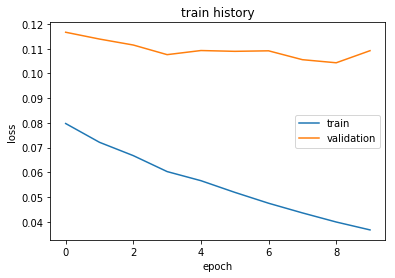

In [14]:
import matplotlib.pyplot as plt

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('train history')
    plt.xlabel('epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc = 'center right')
    plt.show()
    
# loss function 的變化    
show_train_history(train_history, 'acc', 'val_acc')

# accuracy 的變化
show_train_history(train_history, 'loss', 'val_loss')

#### 5. 測試資料評估模型準確率

In [15]:
scores = model.evaluate(x_test_normalize, t_test_onehot)
print()
print('accuracy = ', scores[1])

10000/10000 [==============================] - 0s 23us/step

accuracy =  0.9715


### 四、Keras 執行卷積神經網路 (CNN)

#### 1. 資料預處理 (Preprocess)

In [16]:
# 將 (60000, 28, 28) 的影像大小轉換成 60000*28*28*1 的四維矩陣
x_train4D = x_train_image.reshape(x_train_image.shape[0], 28, 28, 1).astype('float32')
x_test4D = x_test_image.reshape(x_test_image.shape[0], 28, 28, 1).astype('float32')

# 將 feature 歸一化
x_train4D_normalize = x_train4D / 255
x_test4D_normalize = x_test4D / 255

# 將 label 進行 one-hot-encoding 轉換
t_train_onehot = np_utils.to_categorical(t_train_label)
t_test_onehot = np_utils.to_categorical(t_test_label)

#### 2. 建立卷積神經網路(CNN)模型

In [18]:
# 匯入所需的模組
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# 建立線性堆疊模型(骨架)
model = Sequential()

# 建立輸入層與卷積層
# 參數說明: filters (濾鏡數目)，kernel_size (濾鏡大小)，
# padding (填充的大小)，input_shape (輸入影像的形狀), activation (活化函數)          
model.add(Conv2D(filters = 16, kernel_size = (5, 5), padding = 'same',
                 input_shape = (28, 28, 1), activation = 'relu'))

# 建立池化層
# 參數說明: pool_size (池化層的形狀大小)
model.add(MaxPooling2D(pool_size = (2, 2)))

# 建立平坦層
model.add(Flatten())

# 建立 Dropout 層 (避免 overfitting)
model.add(Dropout(0.5))

# 建立隱藏層
model.add(Dense(units = 100, activation = 'relu'))

# 建立輸出層
model.add(Dense(units = 10, activation = 'softmax'))

# 查看模型摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3136)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               313700    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 315,126
Trainable params: 315,126
Non-trainable params: 0
_________________________________________________________________
None

#### 3. 進行神經網路的訓練

In [19]:
# 定義訓練方式
# 參數說明: loss (損失函數)，optimizer (最佳化的方法)，metrics (評估模型的方式)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 開始訓練
# 參數說明: x, y (輸入的資料)，validation_split (驗證資料的比例)
# epochs (訓練週期)， batch_size (批次數量)，verbose (顯示訓練的過程)
train_history = model.fit(x = x_train4D_normalize, y = t_train_onehot, validation_split = 0.2, 
                         epochs = 10, batch_size = 200, verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 29s - loss: 0.3948 - acc: 0.8810 - val_loss: 0.1365 - val_acc: 0.9615
Epoch 2/10
 - 28s - loss: 0.1460 - acc: 0.9570 - val_loss: 0.0864 - val_acc: 0.9758
Epoch 3/10
 - 29s - loss: 0.1069 - acc: 0.9673 - val_loss: 0.0722 - val_acc: 0.9783
Epoch 4/10
 - 27s - loss: 0.0883 - acc: 0.9728 - val_loss: 0.0614 - val_acc: 0.9827
Epoch 5/10
 - 27s - loss: 0.0760 - acc: 0.9772 - val_loss: 0.0568 - val_acc: 0.9833
Epoch 6/10
 - 29s - loss: 0.0657 - acc: 0.9791 - val_loss: 0.0511 - val_acc: 0.9846
Epoch 7/10
 - 28s - loss: 0.0597 - acc: 0.9808 - val_loss: 0.0509 - val_acc: 0.9847
Epoch 8/10
 - 28s - loss: 0.0537 - acc: 0.9824 - val_loss: 0.0458 - val_acc: 0.9864
Epoch 9/10
 - 27s - loss: 0.0483 - acc: 0.9844 - val_loss: 0.0448 - val_acc: 0.9863
Epoch 10/10
 - 29s - loss: 0.0449 - acc: 0.9859 - val_loss: 0.0428 - val_acc: 0.9869


#### 4. 圖形顯示訓練過程

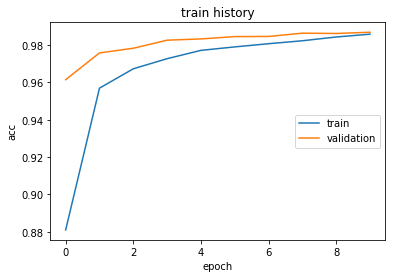

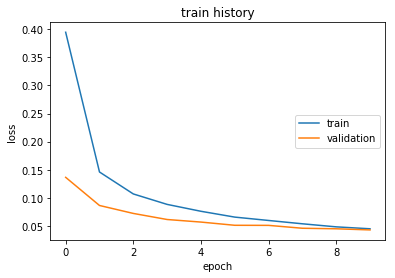

In [20]:
import matplotlib.pyplot as plt

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('train history')
    plt.xlabel('epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc = 'center right')
    plt.show()
    
# loss function 的變化    
show_train_history(train_history, 'acc', 'val_acc')

# accuracy 的變化
show_train_history(train_history, 'loss', 'val_loss')

#### 5. 測試資料評估模型準確率

In [21]:
scores = model.evaluate(x_test4D_normalize, t_test_onehot)
print()
print('accuracy = ', scores[1])

10000/10000 [==============================] - 3s 286us/step

accuracy =  0.9876
